In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1.Datasets

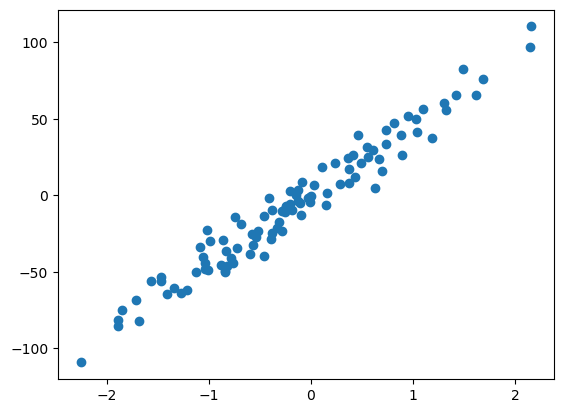

In [3]:
x,y = make_regression(n_samples = 100, n_features = 1 , noise = 10)
plt.scatter(x,y)

In [5]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [6]:
# Matrice X
X = np.concatenate((x, np.ones((x.shape))), axis = 1)
print(X.shape)

(100, 2)


In [7]:
print(X)

[[-1.0154187   1.        ]
 [ 1.03997808  1.        ]
 [-1.08506306  1.        ]
 [-0.12273988  1.        ]
 [-0.8309944   1.        ]
 [-0.68568023  1.        ]
 [ 0.66430854  1.        ]
 [ 0.60875252  1.        ]
 [ 0.56090026  1.        ]
 [ 0.73211402  1.        ]
 [ 0.28853224  1.        ]
 [-0.01030849  1.        ]
 [-1.46888906  1.        ]
 [-0.39392299  1.        ]
 [-0.02936842  1.        ]
 [-1.56048816  1.        ]
 [-0.53827358  1.        ]
 [ 1.48623397  1.        ]
 [-0.78350315  1.        ]
 [ 2.1593478   1.        ]
 [-1.26616472  1.        ]
 [-1.84662735  1.        ]
 [-0.76507779  1.        ]
 [-1.67739002  1.        ]
 [-1.46937378  1.        ]
 [-0.83571224  1.        ]
 [ 0.02662167  1.        ]
 [ 0.73093575  1.        ]
 [-1.12763849  1.        ]
 [ 1.30173082  1.        ]
 [-1.88744755  1.        ]
 [-1.21699645  1.        ]
 [-0.33421409  1.        ]
 [ 0.23994379  1.        ]
 [ 0.15084952  1.        ]
 [-0.72075753  1.        ]
 [ 0.10558021  1.        ]
 

In [8]:
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[-2.11880327]
 [-0.98095659]]


## 2.Modèle

In [9]:
def model(X,theta):
    return X.dot(theta)

In [10]:
model(X,theta)

array([[ 1.17051588],
       [-3.18446553],
       [ 1.31807858],
       [-0.72089492],
       [ 0.77975706],
       [ 0.47186493],
       [-2.3884957 ],
       [-2.27078342],
       [-2.16939388],
       [-2.53216216],
       [-1.59229964],
       [-0.95911492],
       [ 2.13133036],
       [-0.14631128],
       [-0.91873067],
       [ 2.32541082],
       [ 0.15953924],
       [-4.12999399],
       [ 0.67913246],
       [-5.55618977],
       [ 1.70179735],
       [ 2.93168348],
       [ 0.64009274],
       [ 2.57310288],
       [ 2.13235738],
       [ 0.78975323],
       [-1.03736266],
       [-2.52966564],
       [ 1.40828752],
       [-3.73906809],
       [ 3.01817345],
       [ 1.59761946],
       [-0.27282267],
       [-1.48935027],
       [-1.30057703],
       [ 0.54618682],
       [-1.20466027],
       [ 0.21173681],
       [-0.71774689],
       [-2.99012445],
       [-0.99061372],
       [ 1.14231384],
       [-0.17562325],
       [ 0.78927541],
       [-2.87744533],
       [-0

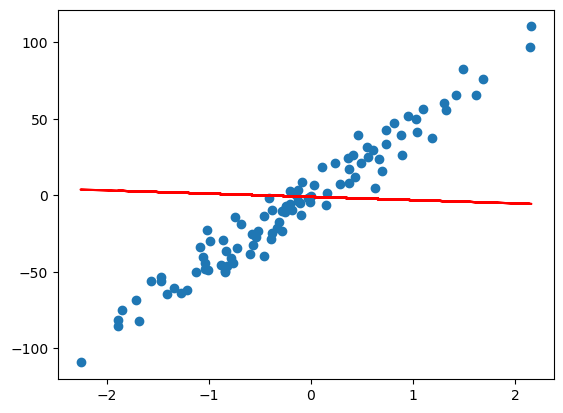

In [14]:
plt.scatter(x,y)
plt.plot(x, model(X,theta) , c ='red')

## 3. Fonction coût

In [15]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta) - y)**2)

In [16]:
cost_function(X,y,theta)

999.7648354854257

## 4. Gradient et Descente de Gradient

In [17]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [25]:
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate*grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

## 5.Entraînement du modèle

In [26]:
theta_final , cost_history = gradient_descent(X,y, theta, learning_rate = 0.01, n_iterations = 1000)

In [27]:
print(theta_final)

[[44.51260872]
 [ 0.68266934]]


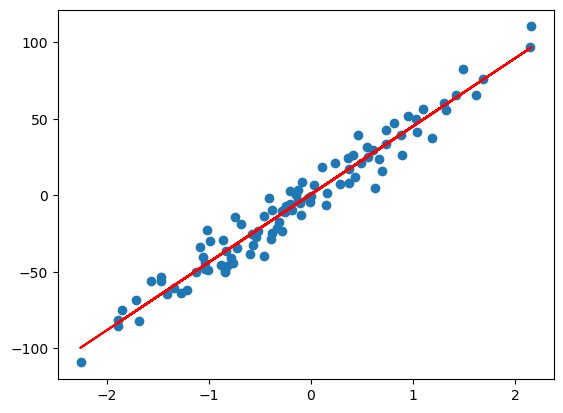

In [28]:
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c = 'r')

## 6. Courbe d'apprentissage

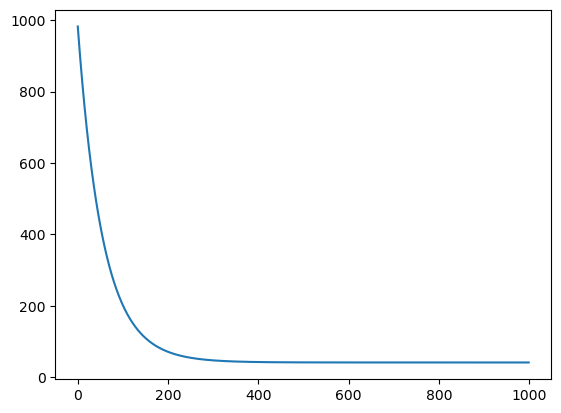

In [29]:
plt.plot(range(1000), cost_history)

## 7. Coefficient de détermination

In [31]:
def coef_determination(y , pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1-u/v

In [32]:
coef_determination(y , prediction)

0.9542410209958185